Brief EDA of the Telco Customer Churn dataset

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load churn dataset into datframe
data = pd.read_csv('c:\datasets\churn.csv')

In [17]:
# obtain dimensions & variable types
print("Dimensions:", data.shape, "\n")
print("Variable types:")
print(data.dtypes)


Dimensions: (7043, 21) 

Variable types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [16]:
# First 5 rows of the dataset to see what data looks like
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
#'TotalCharges' is actually a numerical attriibute (it shows a total amount), but was somehow read as an object
#(possibly because of missing values).  

# Convert to numerical and check dataset for missing values

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check for any missing values after conversion
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

AxesSubplot(0.125,0.11;0.775x0.77)


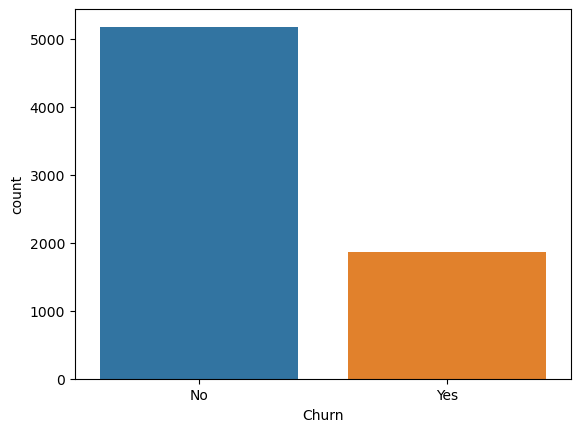

In [21]:
# Visualize distribution of class variable 

churn_dist=sns.countplot(x='Churn', data=data)
print(churn_dist)

<AxesSubplot:>

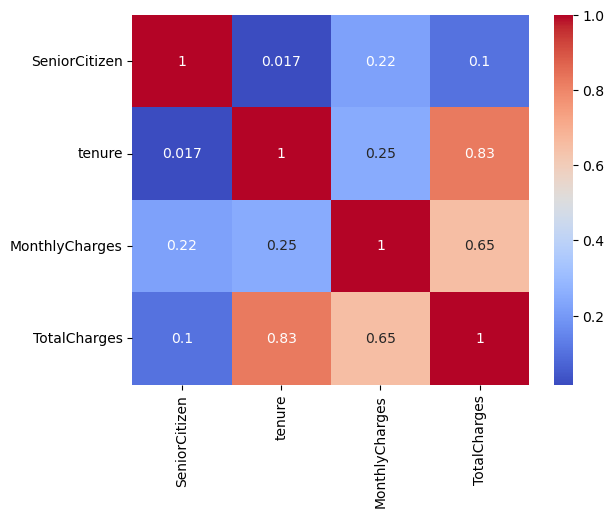

In [23]:
#Examine correlation between the numeric features

# Select numeric columns
numeric_cols = data.select_dtypes(include=[np.number])

# Calculate correlation
corr = numeric_cols.corr()

# Plot heatmap
corr_heatmap=sns.heatmap(corr, annot=True, cmap='coolwarm')
corr_heatmap